---
<h1 style="text-align: center;">EXERCÍCIO APLICADO 1:</h1>
<h2 style="text-align: center;">Montando um portfólio "a la Trump" para 2017</h2>

*Discentes*

    *   Gabriel D'assumpção de Carvalho

*Data:* 07/06/2024

---
---

In [93]:
# !pip install yfinance
# !pip install pandas
# !pip install mathplotlib
# !pip install numpy

In [94]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [95]:
# Salvar o conteúdo do arquivo localmente
with open('time_series_functions.py', 'w') as file:
    file.write(response.text)

# Definir os investimentos no portfólio
portfolio_investments = {
    "BAC": 10000, "C": 10000, "FCAU.VI": 2000, "PNR": 8000, "LRCX": 5000,
    'PANW': 5000, 'CHKP': 5000, 'MTN': 5000, 'WMB': 5000, 'SU': 5000,
    'XME': 10000, 'NEM': 5000, 'BTG': 5000, 'CELG': 2000, 'VAR': 2000,
    'UNH': 6000, 'PRNDY': 2000, 'SHEL': 2000, 'GSK': 2000, 'SONY': 4000
}

# Total investido
total_invested = sum(portfolio_investments.values())

# Peso para cada ativo
weights = [w / total_invested for w in portfolio_investments.values()]

In [96]:
print(f'Total Invested: {total_invested}')
print(f'Weigth for activities: {weights}')


Total Invested: 100000
Weigth for activities: [0.1, 0.1, 0.02, 0.08, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.05, 0.05, 0.02, 0.02, 0.06, 0.02, 0.02, 0.02, 0.04]


In [97]:
# Definir data de início e fim
start_date = "2016-12-31"
end_date = "2017-12-31"

In [98]:
# Obter dados do Yahoo Finance
df_portfolio = yf.download(list(portfolio_investments.keys()), start=start_date, end=end_date, progress=False)[['Close','Adj Close', 'Volume']]
df_portfolio = pd.DataFrame(df_portfolio)
df_portfolio.head()


2 Failed downloads:
['VAR', 'CELG']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Price           Close                                                      \
Ticker            BAC   BTG          C CELG       CHKP FCAU.VI        GSK   
Date                                                                        
2017-01-03  22.530001  2.53  60.590000  NaN  84.570000     NaN  38.840000   
2017-01-04  22.950001  2.54  61.410000  NaN  84.919998     NaN  39.090000   
2017-01-05  22.680000  2.78  60.340000  NaN  86.660004     NaN  39.730000   
2017-01-06  22.680000  2.71  60.549999  NaN  87.239998     NaN  39.380001   
2017-01-09  22.549999  2.70  60.220001  NaN  87.199997     NaN  39.430000   

Price                                          ...     Volume             \
Ticker            LRCX         MTN        NEM  ...       PANW        PNR   
Date                                           ...                         
2017-01-03  107.260002  160.979996  34.630001  ...  3411300.0  1901900.0   
2017-01-04  107.320000  162.259995  34.959999  ...  4809000.0  1524140.0   
2017-01-05  107.080002  163.639999  36.570000  ...  9855300.0  1234083.0   
2017-01-06  107.599998  164.470001  35.419998  ...  8682300.0  1014158.0   
2017-01-09  108.860001  161.729996  35.360001  ...  4506300.0  1300790.0   

Price                                                                \
Ticker        PRNDY       SHEL       SONY         SU        UNH VAR   
Date                                                                  
2017-01-03  86900.0  5647968.0   894900.0  2842100.0  3539700.0 NaN   
2017-01-04  19900.0  3916628.0   910500.0  1779600.0  2695200.0 NaN   
2017-01-05  45200.0  3310273.0  1027500.0  1905700.0  2961100.0 NaN   
2017-01-06  49700.0  2235492.0   964800.0  1846600.0  3081300.0 NaN   
2017-01-09  58100.0  3618892.0   648700.0  2458100.0  3040800.0 NaN   

Price                             
Ticker            WMB        XME  
Date                              
2017-01-03  5750600.0  3127000.0  
2017-01-04  4273900.0  5998900.0  
2017-01-05  7443700.0  4145100.0  
2017-01-06  5847100.0  4203100.0  
2017-01-09  6145300.0  3032000.0  

[5 rows x 60 columns]

In [99]:
# Calcular retornos diários
returns_adj_close = df_portfolio['Adj Close'].pct_change()[1:]
returns_close = df_portfolio['Close'].pct_change()[1:]

C:\Users\Gabriel Carvalho\AppData\Local\Temp\ipykernel_10196\3746301986.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_adj_close = df_portfolio['Adj Close'].pct_change()[1:]
C:\Users\Gabriel Carvalho\AppData\Local\Temp\ipykernel_10196\3746301986.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_close = df_portfolio['Close'].pct_change()[1:]


In [100]:
# Calcular retornos ponderados
returns_weighted_close = pd.DataFrame(returns_close * weights)
returns_weighted_adj_close = pd.DataFrame(returns_adj_close * weights)

In [101]:
ret_clo_w = pd.DataFrame(ret_close * w_a)
ret_adj_w = pd.DataFrame(ret_adj * w_a)
ret_clo_w.head()

Ticker,BAC,BTG,C,CELG,CHKP,FCAU.VI,GSK,LRCX,MTN,NEM,PANW,PNR,PRNDY,SHEL,SONY,SU,UNH,VAR,WMB,XME
Date,,,,,,,,,,,,,,,,,,,,
2001-01-03,0.006818,NaN,0.001757,NaN,0.014989,NaN,-0.000951,0.010000,0.003288,-0.001394,NaN,0.001648,NaN,-0.000340,0.002052,-0.001371,-0.000594,NaN,-0.000231,NaN
2001-01-04,0.003129,NaN,0.000273,NaN,-0.002459,NaN,-0.002452,0.002717,-0.002185,-0.000896,NaN,0.000266,NaN,-0.000244,-0.000319,-0.003273,-0.001399,NaN,-0.001133,NaN
2001-01-05,-0.006796,NaN,-0.000718,NaN,-0.007368,NaN,-0.000300,0.000344,-0.002285,-0.000730,NaN,-0.001852,NaN,0.000391,0.000545,0.000824,0.000282,NaN,0.000777,NaN
2001-01-08,0.000521,NaN,-0.000116,NaN,-0.002442,NaN,0.000000,0.002602,0.000282,0.000185,NaN,-0.000549,NaN,-0.000162,-0.000066,-0.000325,-0.000070,NaN,0.000238,NaN
2001-01-09,-0.002591,NaN,-0.000445,NaN,0.001693,NaN,0.000121,-0.000852,0.001401,-0.000923,NaN,0.000417,NaN,-0.000672,0.000067,-0.000981,0.000209,NaN,-0.001412,NaN


In [102]:
ret_adj_w.head()

Ticker,BAC,BTG,C,CELG,CHKP,FCAU.VI,GSK,LRCX,MTN,NEM,PANW,PNR,PRNDY,SHEL,SONY,SU,UNH,VAR,WMB,XME
Date,,,,,,,,,,,,,,,,,,,,
2001-01-03,0.006818,NaN,0.001757,NaN,0.014989,NaN,-0.000951,0.010000,0.003288,-0.001394,NaN,0.001648,NaN,-0.000340,0.002052,-0.001371,-0.000594,NaN,-0.000231,NaN
2001-01-04,0.003129,NaN,0.000273,NaN,-0.002459,NaN,-0.002452,0.002717,-0.002185,-0.000896,NaN,0.000266,NaN,-0.000244,-0.000319,-0.003273,-0.001399,NaN,-0.001133,NaN
2001-01-05,-0.006796,NaN,-0.000718,NaN,-0.007368,NaN,-0.000300,0.000344,-0.002285,-0.000730,NaN,-0.001852,NaN,0.000391,0.000545,0.000824,0.000282,NaN,0.000777,NaN
2001-01-08,0.000521,NaN,-0.000116,NaN,-0.002442,NaN,0.000000,0.002602,0.000282,0.000185,NaN,-0.000549,NaN,-0.000162,-0.000066,-0.000325,-0.000070,NaN,0.000238,NaN
2001-01-09,-0.002591,NaN,-0.000445,NaN,0.001693,NaN,0.000121,-0.000852,0.001401,-0.000923,NaN,0.000417,NaN,-0.000672,0.000067,-0.000981,0.000209,NaN,-0.001412,NaN


In [103]:
# Calcular retornos totais ponderados
total_returns_adj_close_weighted = returns_weighted_adj_close.sum(axis=1)
total_returns_close_weighted = returns_weighted_close.sum(axis=1)

In [104]:
# Calcular retorno acumulado
cumulative_returns_adj_close = (1 + total_returns_adj_close_weighted).cumprod()
cumulative_returns_close = (1 + total_returns_close_weighted).cumprod()

In [105]:
# Calcular o valor do portfólio
portfolio_value_adj_close = pd.DataFrame(cumulative_returns_adj_close * total_invested, columns=['Portfolio Value (Adj Close)'])
portfolio_value_close = pd.DataFrame(cumulative_returns_close * total_invested, columns=['Portfolio Value (Close)'])

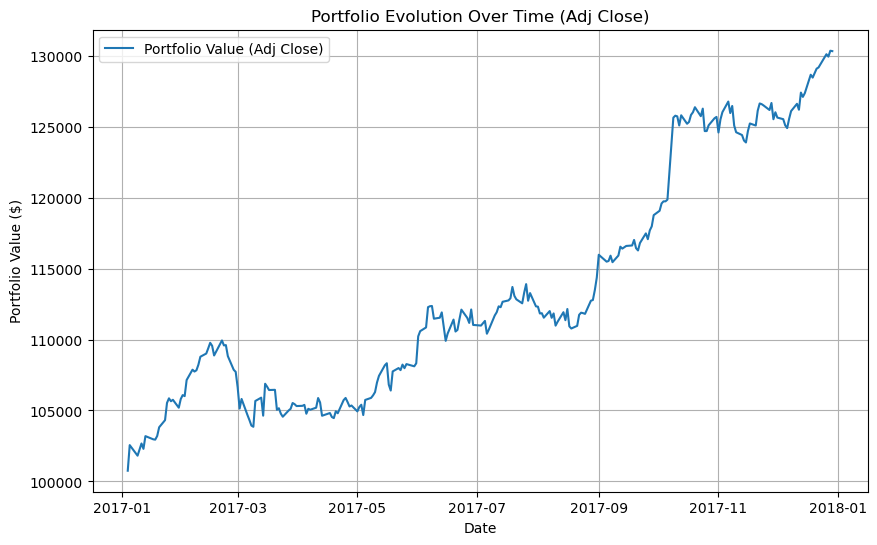

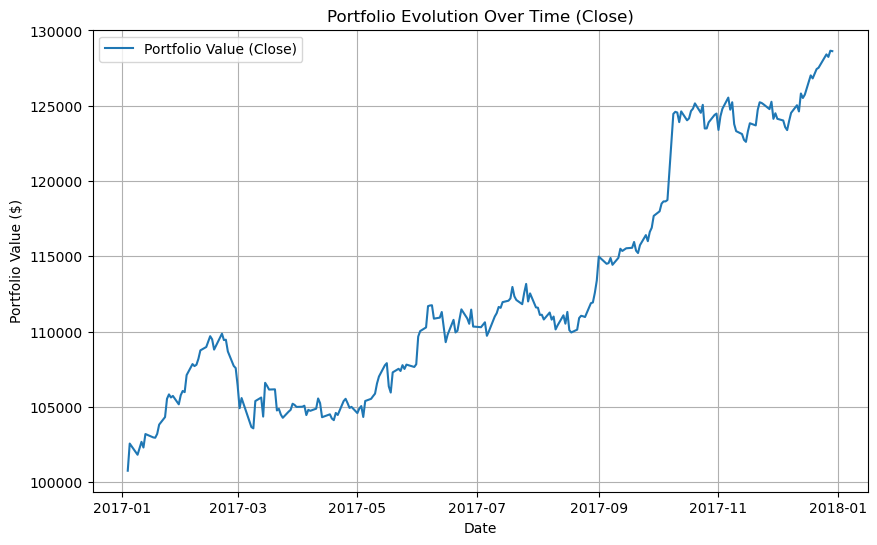

In [106]:
# Plotar o valor do portfólio
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value_adj_close, label='Portfolio Value (Adj Close)')
plt.title('Portfolio Evolution Over Time (Adj Close)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(portfolio_value_close, label='Portfolio Value (Close)')
plt.title('Portfolio Evolution Over Time (Close)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
# Média móvel de 50 períodos
movie_average_adj_50 = portfolio_value_adj_close.rolling(window=50).mean()
movie_average_close_50 = portfolio_value_close.rolling(window=50).mean()

In [108]:
# Média móvel de 100 períodos
movie_average_adj_100 = portfolio_value_adj_close.rolling(window=100).mean()
movie_average_close_100 = portfolio_value_close.rolling(window=100).mean()

In [109]:
# Média móvel de 200 períodos
movie_average_adj_200 = portfolio_value_adj_close.rolling(window=200).mean()
movie_average_close_200 = portfolio_value_close.rolling(window=200).mean()


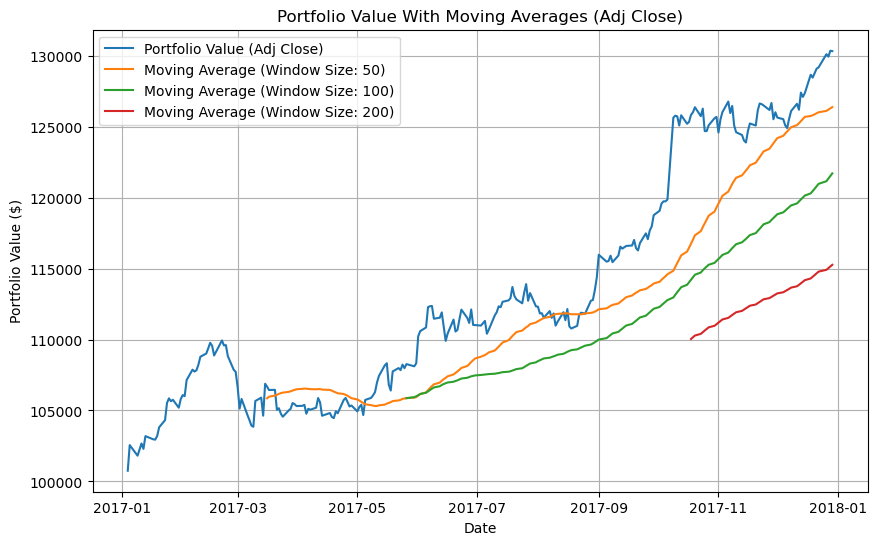

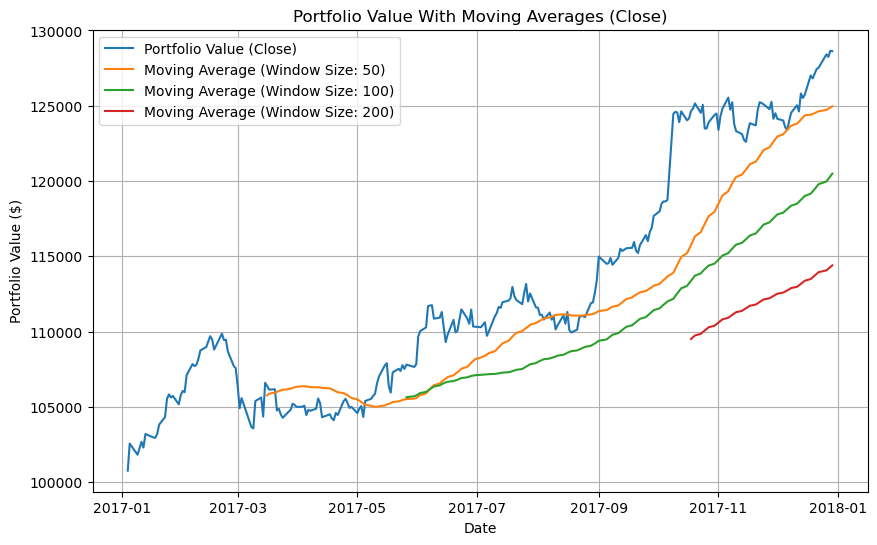

In [110]:
# Plotar o valor do portfólio com média móvel
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value_adj_close, label='Portfolio Value (Adj Close)')
plt.plot(movie_average_adj_50, label='Moving Average (Window Size: 50)')
plt.plot(movie_average_adj_100, label='Moving Average (Window Size: 100)')
plt.plot(movie_average_adj_200, label='Moving Average (Window Size: 200)')
plt.title('Portfolio Value With Moving Averages (Adj Close)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(portfolio_value_close, label='Portfolio Value (Close)')
plt.plot(movie_average_close_50, label='Moving Average (Window Size: 50)')
plt.plot(movie_average_close_100, label='Moving Average (Window Size: 100)')
plt.plot(movie_average_close_200, label='Moving Average (Window Size: 200)')
plt.title('Portfolio Value With Moving Averages (Close)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()
